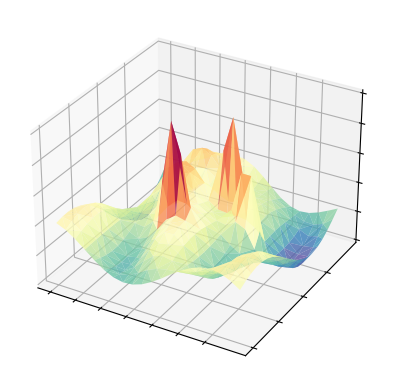

In [19]:
# Generating a manifold with 3 gentle peaks in a more random distribution, a valley, and more undulations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulating data with gentle peaks, a valley, and more undulations
np.random.seed(0)
age = np.linspace(20, 90, 20)
weight = np.linspace(40, 200, 20)
age, weight = np.meshgrid(age, weight)

# Defining the function to create gentle peaks, a valley, and more undulations
pr_highbp = (
    np.exp(-0.05 * ((age - 50)**2 + (weight - 100)**2)) +  # gentle peak 1
    np.exp(-0.05 * ((age - 60)**2 + (weight - 150)**2)) +  # gentle peak 2
    np.exp(-0.05 * ((age - 70)**2 + (weight - 130)**2)) -  # gentle peak 3
    0.5 * np.exp(-0.02 * ((age - 40)**2 + (weight - 160)**2)) +  # valley
    0.3 * np.sin(age / 10) * np.cos(weight / 50) +  # more undulations
    0.2 * np.sin(age / 5) * np.cos(weight / 25)  # even more undulations
)

# Normalizing the data
pr_highbp = (pr_highbp - np.min(pr_highbp)) / (np.max(pr_highbp) - np.min(pr_highbp))

# Flattening the meshgrid arrays to match plot_trisurf input
age_flat = age.flatten()
weight_flat = weight.flatten()
pr_highbp_flat = pr_highbp.flatten()

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(age_flat, weight_flat, pr_highbp_flat, cmap='Spectral_r', alpha=0.8)

# Setting ticks
ax.set_xticks(np.arange(20, 90, step=10))
ax.set_yticks(np.arange(40, 200, step=40))
ax.set_zticks(np.arange(0, 1.2, step=0.2))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.savefig('manifold_plot.svg', format='svg', bbox_inches='tight', pad_inches=0)